In [19]:
import os 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [20]:
dataset_path = "E:/ikm/machine learning/basic-machine-learning-projects/8. digit classification 3,6 and 0/data"

images = []
labels = []

for subfolder in os.listdir(dataset_path):
    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

    for image_filename in os.listdir(subfolder_path):
        image_path = os.path.join(subfolder_path, image_filename)

        images.append(image_path)
        labels.append(subfolder)


df = pd.DataFrame({'images': images, 'labels': labels})
df

,images,labels
0,E:/ikm/machine learning/basic-machine-learning...,six
1,E:/ikm/machine learning/basic-machine-learning...,six
2,E:/ikm/machine learning/basic-machine-learning...,six
3,E:/ikm/machine learning/basic-machine-learning...,six
4,E:/ikm/machine learning/basic-machine-learning...,six
...,...,...
1279,E:/ikm/machine learning/basic-machine-learning...,zero
1280,E:/ikm/machine learning/basic-machine-learning...,zero
1281,E:/ikm/machine learning/basic-machine-learning...,zero
1282,E:/ikm/machine learning/basic-machine-learning...,zero


<Axes: xlabel='labels', ylabel='count'>

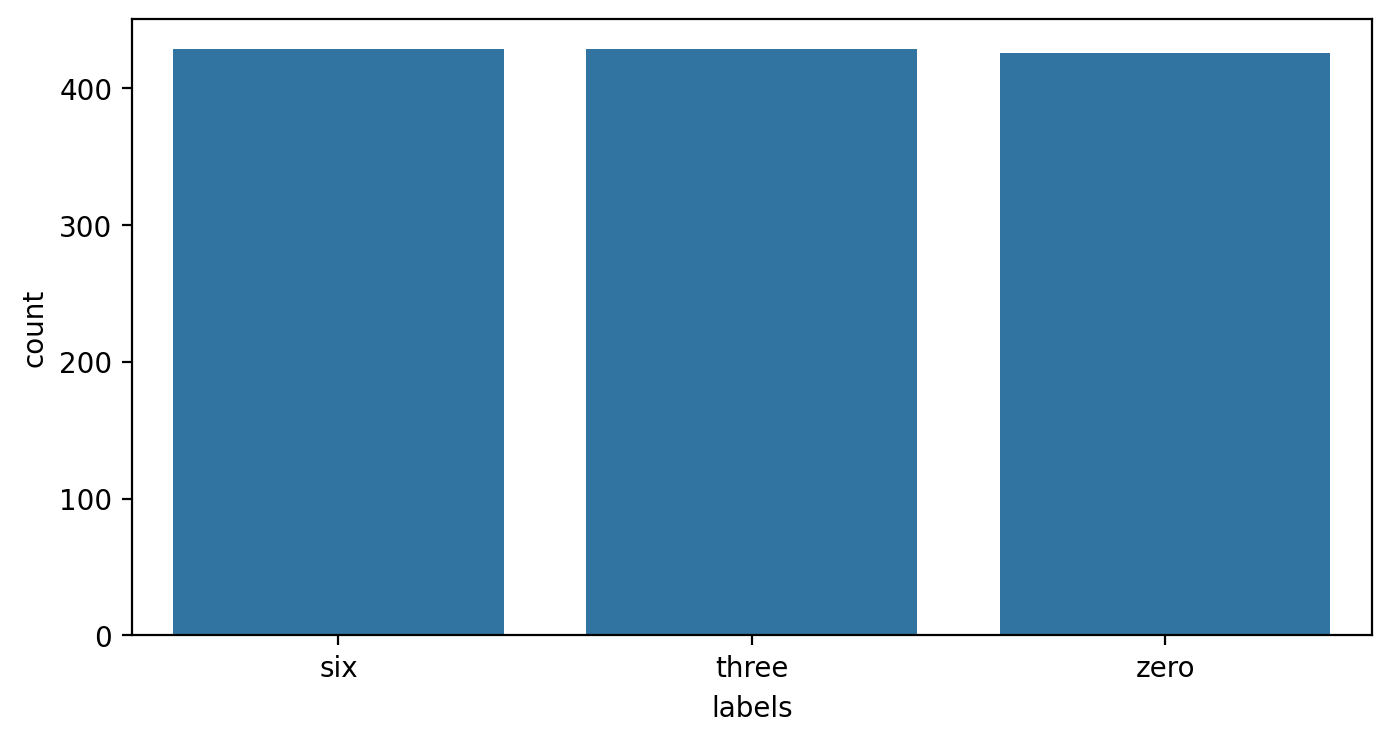

In [21]:
plt.figure(figsize=(8,4), dpi=200)
sns.countplot(x=df['labels'])

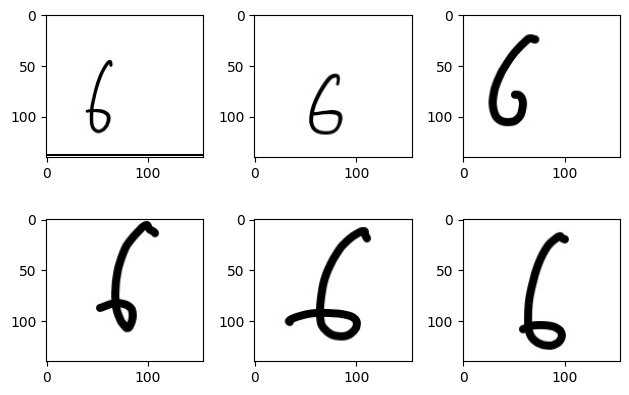

In [22]:
six_filepath = df[df['labels'] == 'six']['images'][:6]
i = 0
for path in six_filepath:
    plt.subplot(2, 3, i+1)
    plt.imshow(plt.imread(path))
    plt.tight_layout()
    i+=1

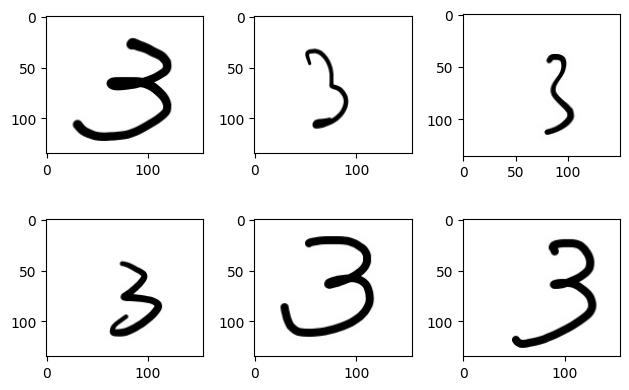

In [23]:
six_filepath = df[df['labels'] == 'three']['images'][:6]
i = 0
for path in six_filepath:
    plt.subplot(2, 3, i+1)
    plt.imshow(plt.imread(path))
    plt.tight_layout()
    i+=1

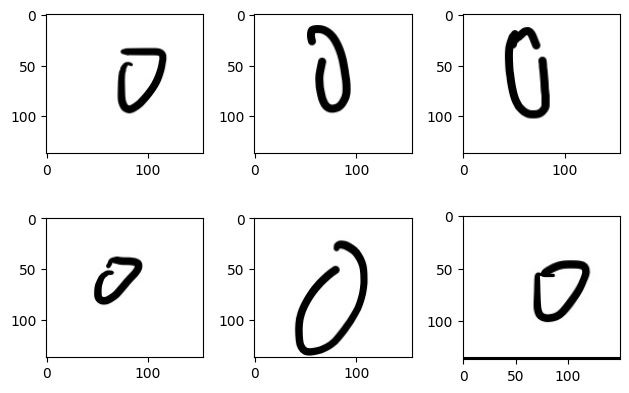

In [24]:
six_filepath = df[df['labels'] == 'zero']['images'][:6]
i = 0
for path in six_filepath:
    plt.subplot(2, 3, i+1)
    plt.imshow(plt.imread(path))
    plt.tight_layout()
    i+=1

In [25]:
from sklearn.model_selection import train_test_split

X = df["images"]
y = df["labels"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

df_train = pd.DataFrame({'image': X_train, 'label': y_train})
df_test = pd.DataFrame({'image': X_test, 'label': y_test})


from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()

y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = (50, 50)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    batch_size=batch_size,
    class_mode="categorical",
    target_size = image_size
)

test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

Found 898 validated image filenames belonging to 3 classes.
Found 386 validated image filenames belonging to 3 classes.


In [31]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(50,50,3)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\python 3.9\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [33]:
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
 1/29 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.3438 - loss: 1.1229

c:\python 3.9\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.3978 - loss: 1.2162 - val_accuracy: 0.5984 - val_loss: 0.9223
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6276 - loss: 0.8236 - val_accuracy: 0.8264 - val_loss: 0.5313
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8743 - loss: 0.3855 - val_accuracy: 0.8601 - val_loss: 0.4012
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9178 - loss: 0.2450 - val_accuracy: 0.8886 - val_loss: 0.3202
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9517 - loss: 0.1414 - val_accuracy: 0.9119 - val_loss: 0.2514
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9779 - loss: 0.0760 - val_accuracy: 0.9093 - val_loss: 0.2542
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9826 - loss: 0.0661 - val_accuracy: 0.9171 - val_loss: 0.2696
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9977 - loss: 0.0245 - val_accuracy: 0.9067 - val_loss: 0

In [34]:
model.evaluate(test_generator)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8923 - loss: 0.2867


[0.23325367271900177, 0.9145077466964722]